# Aimpoint Digital Coding Challenge

In [80]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## For ML Modles
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Import Data
car_df = pd.read_csv('cars.csv')

- ## Explore and Clean the Data

In this section, the data will be cleaned into a readable form

The data cleaning part includes following steps
- Split columns into readable ones
- Change data types
- Missing value check
- Wrong value check

Also, In order to better understand the structure of dataset, an EDA analysis will be applied.

In [4]:
# Print the first 5 rows
car_df.head()

,Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0,STRING;DOUBLE;INT;DOUBLE;DOUBLE;DOUBLE;DOUBLE;...
1,Chevrolet Chevelle Malibu;18.0;8;307.0;130.0;3...
2,Buick Skylark 320;15.0;8;350.0;165.0;3693.;11....
3,Plymouth Satellite;18.0;8;318.0;150.0;3436.;11...
4,AMC Rebel SST;16.0;8;304.0;150.0;3433.;12.0;70;US


In [7]:
# Split the data into readable columns 
new_cols = car_df['Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin'].str.split(';', expand=True)

# assign the resulting columns to new columns in the dataframe
car_df['Car'] = new_cols[0]
car_df['MPG'] = new_cols[1]
car_df['Cylinders'] = new_cols[2]
car_df['Displacement'] = new_cols[3]
car_df['Horsepower'] = new_cols[4]
car_df['Weight'] = new_cols[5]
car_df['Acceleration'] = new_cols[6]
car_df['Model'] = new_cols[7]
car_df['Origin'] = new_cols[8]

# drop the original column
car_df = car_df.drop(columns=['Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin'])

In [8]:
# Print the first 5 rows of the new dataset
car_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


In [9]:
# Print the last 5 rows of the new dataset
car_df.tail()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US
406,Chevy S-10,31.0,4,119.0,82.00,2720.,19.4,82,US


In [10]:
# The first Row is the description of data type, we need to drop this row.
car_df = car_df.drop(0)

In [11]:
# Print the first 5 rows again
car_df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [13]:
# Check the shape of the dataframe
car_df.shape

(406, 9)

In [14]:
# Check the data types of the columns
car_df.dtypes

Car             object
MPG             object
Cylinders       object
Displacement    object
Horsepower      object
Weight          object
Acceleration    object
Model           object
Origin          object
dtype: object

In [15]:
# Change the data types into correct ones
car_df['Car'] = car_df['Car'].astype(str)
car_df['MPG'] = car_df['MPG'].astype(float)
car_df['Cylinders'] = car_df['Cylinders'].astype(int)
car_df['Displacement'] = car_df['Displacement'].astype(float)
car_df['Horsepower'] = car_df['Horsepower'].astype(float)
car_df['Weight'] = car_df['Weight'].astype(float)
car_df['Acceleration'] = car_df['Acceleration'].astype(float)
car_df['Model'] = car_df['Model'].astype(int)
car_df['Origin'] = car_df['Origin'].astype('category')

In [18]:
# Check the data types of the columns again
car_df.dtypes

Car               object
MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Model              int64
Origin          category
dtype: object

In [20]:
# get summary statistics of the numerical columns
car_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [30]:
#If the "mpg" (miles per gallon) and "horsepower" values of a car are both 0,
#it likely means that the data for these variables is missing or unavailable for that particular car.
#Try to find if there exist such rows
zero_values = car_df[(car_df["MPG"] == 0)& (car_df["Horsepower"] == 0)]
print(zero_values)

#there is no such rows

Empty DataFrame
Columns: [Car, MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model, Origin]
Index: []


In [21]:
# Check for missing values
car_df.isnull().sum()
# There is no missing value exist

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

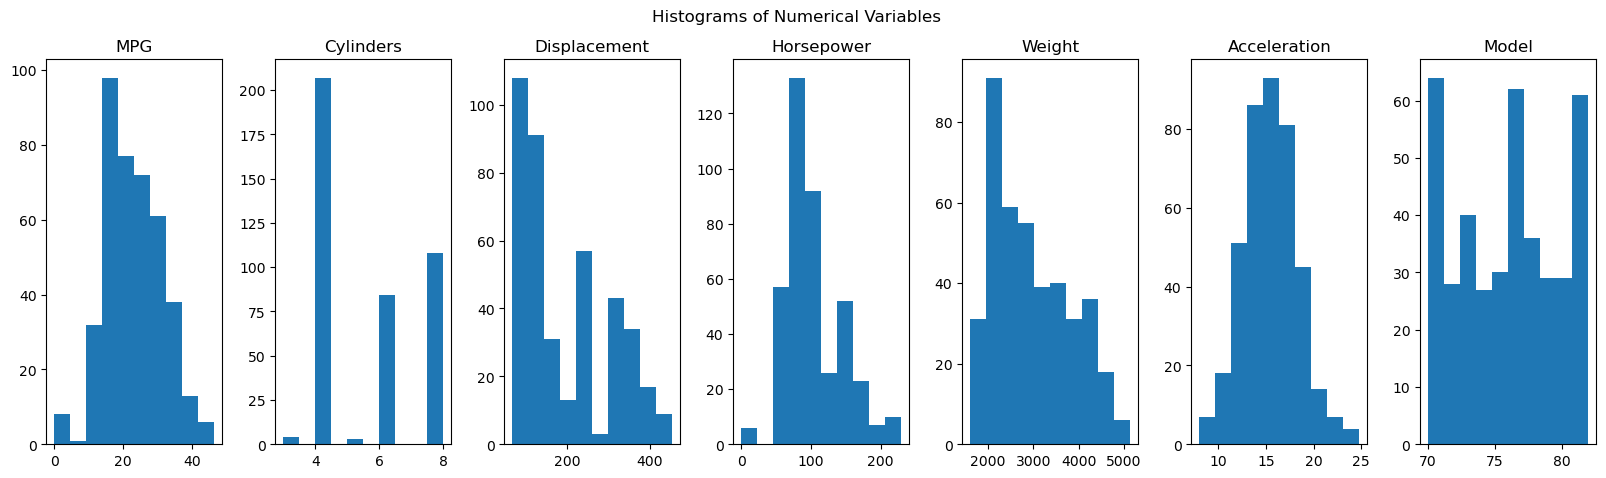

In [33]:
# create histograms of numerical values
fig, axs = plt.subplots(1, 7, figsize=(20,5))

axs[0].hist(car_df["MPG"])
axs[0].set_title("MPG")
axs[1].hist(car_df["Cylinders"])
axs[1].set_title("Cylinders")
axs[2].hist(car_df["Displacement"])
axs[2].set_title("Displacement")
axs[3].hist(car_df["Horsepower"])
axs[3].set_title("Horsepower")
axs[4].hist(car_df["Weight"])
axs[4].set_title("Weight")
axs[5].hist(car_df["Acceleration"])
axs[5].set_title("Acceleration")
axs[6].hist(car_df["Model"])
axs[6].set_title("Model")

fig.suptitle("Histograms of Numerical Variables")

plt.subplots_adjust(wspace=0.3)

plt.show()

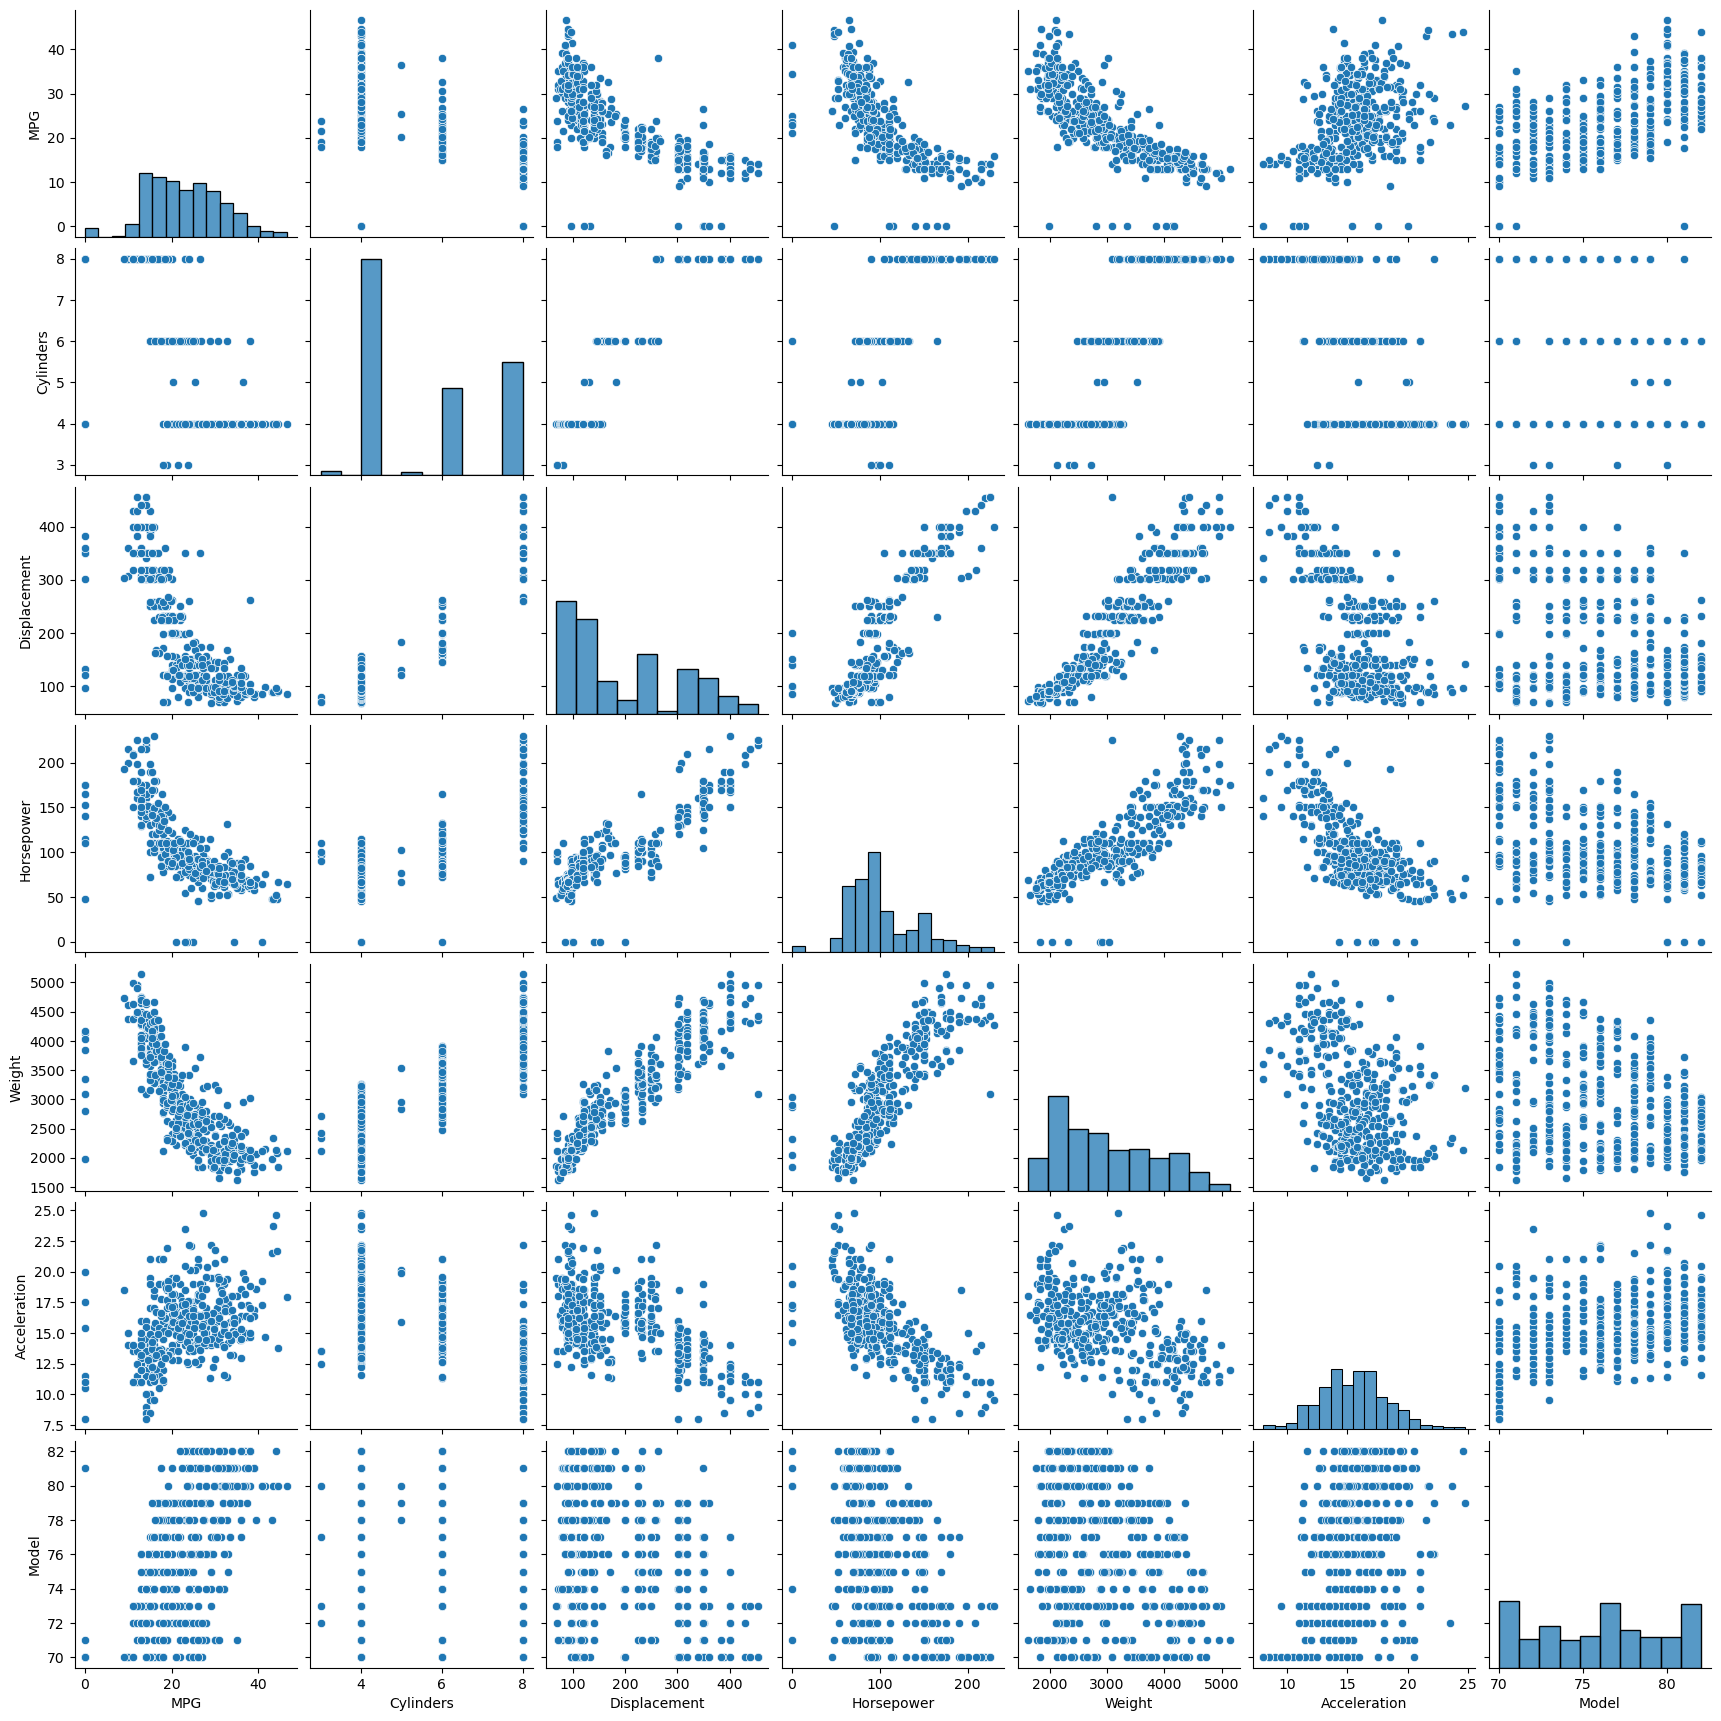

In [31]:
# Explore the relationship of the numerical columns
sns.pairplot(car_df)
plt.show()

In [38]:
# Explore the distribution of non_numerical variables
car_df['Origin'].unique()
#The origin of the cars come from three countries

['US', 'Europe', 'Japan']
Categories (3, object): ['Europe', 'Japan', 'US']

In [40]:
car_df['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

In [42]:
car_df['Car'].nunique()
# The dataset contain 308 different cars

308

In [39]:
car_df['Car'].value_counts()

Toyota Corolla                9
Ford Pinto                    6
Ford Maverick                 5
AMC Matador                   5
Volkswagen Rabbit             5
                             ..
Plymouth Grand Fury           1
Chevrolete Chevelle Malibu    1
Plymouth Fury                 1
Buick Skyhawk                 1
Chevy S-10                    1
Name: Car, Length: 308, dtype: int64

- ## Question 1

Find the car with the highest MPG

In [47]:
df_sorted = car_df.sort_values("MPG", ascending=False)

highest_mpg = df_sorted.iloc[0]

print("The car with the highest MPG is {} ,which has a MPG of {}".format(highest_mpg["Car"], highest_mpg["MPG"]))

The car with the highest MPG is Mazda GLC ,which has a MPG of 46.6


- ## Question 2

Find everage MPG per cylinder count

In [56]:
avg_mpg_per_cylinder = car_df.groupby("Cylinders")["MPG"].mean()

avg_mpg_table = pd.DataFrame(avg_mpg_per_cylinder.reset_index(name="Average MPG"))
avg_mpg_table

,Cylinders,Average MPG
0,3,20.550000
1,4,28.862319
2,5,27.366667
3,6,19.985714
4,8,14.270370


- ## Question 3

Find each make's average MPG (Chevy,Ford,etc)

In [55]:
#Extract the makers' name from column 'Car'
car_df["Make"] = car_df["Car"].str.split(" ", n=1, expand=True)[0]

avg_mpg_by_make = car_df.groupby("Make")["MPG"].mean()

avg_mpg_table_1 = pd.DataFrame(avg_mpg_by_make.reset_index(name="Average MPG"))
avg_mpg_table_1

,Make,Average MPG
0,AMC,17.617241
1,Audi,26.714286
2,BMW,23.750000
3,Buick,19.182353
4,Cadillac,19.750000
5,Capri,25.000000
6,Chevrolet,19.851111
7,Chevrolete,16.000000
8,Chevy,20.500000
9,Chrysler,17.266667


- ## Question 4

Build a predictive model to predict the MPG based on other data. What is your optimal error metric on the test set?

In [79]:
#Drop column of  'Car' and use column 'Make' instead
#Because 'Car' has too many unique values
ml_df=car_df.drop(["Car"], axis=1)
ml_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Make
1,18.0,8,307.0,130.0,3504.0,12.0,70,US,Chevrolet
2,15.0,8,350.0,165.0,3693.0,11.5,70,US,Buick
3,18.0,8,318.0,150.0,3436.0,11.0,70,US,Plymouth
4,16.0,8,304.0,150.0,3433.0,12.0,70,US,AMC
5,17.0,8,302.0,140.0,3449.0,10.5,70,US,Ford


In [82]:
# Split the data into train and test
train_df, test_df = train_test_split(ml_df, test_size=0.2, random_state=42)

In [83]:
# Build ML Pipeline
# Define the features and target columns
num_features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']
cat_features = ['Origin', 'Make']
target = 'MPG'

# Define the preprocessing steps
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Define models
linear = LinearRegression()
tree = DecisionTreeRegressor(random_state=42)
forest = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

models = [('Linear Regression', linear),
          ('Decision Tree Regression', tree),
          ('Random Forest Regression', forest),
          ('Gradient Boosting Regression', gb),
          ('XGBoost Regression', xgb)]

pipelines = []
for name, model in models:
    pipelines.append(('{} Pipeline'.format(name), Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])))

# Fit and evaluate the models
results = []
for name, pipeline in pipelines:
    pipeline.fit(train_df[num_features + cat_features], train_df[target])
    
    train_pred = pipeline.predict(train_df[num_features + cat_features])
    test_pred = pipeline.predict(test_df[num_features + cat_features])
    
    train_rmse = mean_squared_error(train_df[target], train_pred, squared=False)
    train_mae = mean_absolute_error(train_df[target], train_pred)
    train_r2 = r2_score(train_df[target], train_pred)
    
    test_rmse = mean_squared_error(test_df[target], test_pred, squared=False)
    test_mae = mean_absolute_error(test_df[target], test_pred)
    test_r2 = r2_score(test_df[target], test_pred)
    
    results.append((name, train_rmse, train_mae, train_r2, test_rmse, test_mae, test_r2))

# Output the results
for name, train_rmse, train_mae, train_r2, test_rmse, test_mae, test_r2 in results:
    print('{}:'.format(name))
    print('  Train RMSE: {:.2f}'.format(train_rmse))
    print('  Train MAE: {:.2f}'.format(train_mae))
    print('  Train R2: {:.2f}'.format(train_r2))
    print('  Test RMSE: {:.2f}'.format(test_rmse))
    print('  Test MAE: {:.2f}'.format(test_mae))
    print('  Test R2: {:.2f}'.format(test_r2))   

Linear Regression Pipeline:
  Train RMSE: 3.59
  Train MAE: 2.55
  Train R2: 0.82
  Test RMSE: 4.78
  Test MAE: 3.15
  Test R2: 0.67
Decision Tree Regression Pipeline:
  Train RMSE: 0.00
  Train MAE: 0.00
  Train R2: 1.00
  Test RMSE: 5.04
  Test MAE: 3.24
  Test R2: 0.63
Random Forest Regression Pipeline:
  Train RMSE: 1.41
  Train MAE: 0.90
  Train R2: 0.97
  Test RMSE: 4.37
  Test MAE: 2.50
  Test R2: 0.72
Gradient Boosting Regression Pipeline:
  Train RMSE: 1.70
  Train MAE: 1.26
  Train R2: 0.96
  Test RMSE: 4.57
  Test MAE: 2.61
  Test R2: 0.69
XGBoost Regression Pipeline:
  Train RMSE: 0.09
  Train MAE: 0.06
  Train R2: 1.00
  Test RMSE: 4.53
  Test MAE: 2.74
  Test R2: 0.70


# Conslusion:
#### Based on the machine learning regression models above, the results show that the Random Forest Regression model appears to have the best performance on both the training and test sets with the lowest RMSE and MAE and the highest R2.

#### the worst model here is the Decision Tree Model, there is overfitting since the training RMSE and MAE are 0, which is not realistic, indicating that the model is likely overfitting to the training data.